# Intro to Data Analysis with Pandas & Jupyter, November 2019

Workshop lead: Sam Bail [@spbail](http://twitter.com/spbail)

# Overview
The goal of this workshop is to give learners an intro to data analysis with Python using Pandas and Jupyter. 
We will first go through the process of loading data from CSV files, inspecting and cleaning the data. As a second step, we will analyse the data and draw some insights about cancer treatment from it. 

The tutorial is structured as follows:

- Intro and background
- Part 0: Quick Jupyter exercise
- Part 1: Loading and inspecting data
- Part 2: Data cleaning
- Part 3: Data analysis
- Part 4: Summary

**Note that this tutorial is only intended as an introduction to some basic concepts of Pandas. It is in no means intended to be comprehensive, and there are a lot of useful functions a beginner needs to know to do in-depth data analysis. We hope that this tutorial sets you up for self-guided learning to master the full range of necessary Pandas tools.**

## How to follow along with the workshop
- You can run every cell in the notebook as we go along using the shortcut Shift+Enter
- You will encounter a few <span style="color:blue">*** DIY exercise ***</span> blocks where you'll get a few minutes to try out what you've just learned
- Feel free to save and download your notebook from Binder at the end since Binder deletes notebooks after 12 hours.

# Intro

## What is Jupyter (and the Jupyter ecosystem...)?
- **IPython** is an **interactive Python shell** (just type "ipython" to start it)
- **Jupyter** is a Python library that provides a **web-based UI** on top of ipython to create notebooks with code and output
- **JupyterLab** provides some additional **features on top of Jupyter**, e.g. a file browser
- **Binder** is a **web-based hub** for containers that contain your Python environment and renders notebooks based on a git repo

## What is Pandas/Matplotlib/Pyplot/Seaborn?

- **Pandas** is a Python library for **data manipulation and analysis**. It offers data structures and operations for manipulating numerical tables and time series.
- **Matplotlib** is a Python **2D plotting library**. Pyplot is a collection of command style functions in matplotlib that make matplotlib work like MATLAB. While we mostly use Seaborn, we sometimes fall back to using Pyplot functions for certain aspects of plotting.
- **Seaborn** is a Python **data visualization** library based on matplotlib. It's kind of like a nicer version of Pyplot.
- You can **use Pandas code in a regular Python script** of course. I'm just combining Jupyter + Pandas in this tutorial because notebooks are a great way to immediately see output!

# Part 0: Quick Jupyter exercise (10 mins)

### Notebooks are basically just interactive ipython terminals, often mixed in with markdown text:
- Each input field you see is called a **cell**
- Cells can be **either code or markdown**
- You can execute any kind of Python code
- **Variables persist** between cells
- The notebook **doesn't care about the order of cells**, just the order of executing it in order to remember variables. However, "run all" executes your cells top to bottom.

### Notebooks have **two modes**: a) editing the cells and b) navigating the notebook (command mode):
- You can **navigate** around the notebook in command mode by clicking cells or using the arrow keys
- Depending on the environment you're using (Jupyter notebook, Jupyter lab, Google Colab...) there will be a different **visual cue** (e.g. a colored line) to indicate the mode a cell is in
- In order to **edit a cell**, you can press **Enter** or double-click it.
- To **execute** the cell content, press Shift+Enter to run the cell
- To get **out of edit mode** and back into navigation mode, press the **Escape key**

### Some helpful keyboard shortcuts:
- The **default type for a cell is code**. In command mode, press *m* to make a cell markdown and *y* to make it code
- Press *a* in command mode to create a new cell *above* the current one
- Press *b* in command mode to create a new cell *below* the current one
- *Tab* autocompletes methods (like in IPython)
- *Shift+Tab* shows you the docstring for the outer function of the line your cursor is in
- Press *dd* in command mode to delete a cell. 
- *Cmd+z* undoes operations in the highlighted cell, *z* undoes cell operations in the notebook (e.g. deleting a cell)

In [59]:
# Examples

print('Hello world!')

import math
math.ceil(4.3)

Hello world!


5

### Cell magic in Jupyter
A "cell magic" is a wrapper function that applies to a line or entire cell in a notebook. Jupyter comes with several built-in "magic" functions.
- A single % before the name indicates a line-specific function
- A double %% applies the function to the entire cell

In [60]:
# Line-specific magic to time the statement execution
import numpy
%time numpy.random.normal(size=20)

CPU times: user 823 µs, sys: 3.89 ms, total: 4.72 ms
Wall time: 10.2 ms


array([-1.22267321, -0.07311792, -0.76921282,  1.15126274, -1.978867  ,
       -1.65172859,  0.03229653, -0.78774561,  0.62157257,  0.43808015,
       -0.37072523,  0.25101356, -2.56297829,  0.41138807, -0.24224427,
       -0.31448623, -0.97069831,  0.58461875, -0.03827344,  1.75675627])

In [61]:
%%time

# The magic applies to the whole cell and must come first!
numpy.random.normal(size=20)

CPU times: user 109 µs, sys: 16 µs, total: 125 µs
Wall time: 125 µs


array([ 1.59033108,  0.69820563,  1.08517712,  1.0047909 ,  2.06228372,
        0.53343551,  0.18849474,  0.64356723, -0.23088832,  0.24067516,
        0.82118414,  0.27384043,  0.36668507,  0.93491159,  0.58245286,
       -0.41461551, -1.58777199,  0.1758973 , -1.96423001, -0.12723716])

## <span style="color:blue">*** DIY exercise ***</span>
Try out using only your keyboard and shortcuts for these two tasks:
- Create a new *markdown* cell below this one, write a few lines and format them to look like a header and bullets.
- Create a new *code* cell above the first one one, import your favorite Python function, check out the docstring, and execute the code (e.g. `os.getcwd()`, `random.random()`, etc.)

# Part 1: Loading and inspecting the data (20 mins)

Before we can start answering questions about the data we need to do a little bit of exploratory analysis.The first thing we need to do when working with a new dataset is to get an idea of what the data looks like. We start by loading the data into memory. Pandas comes with a built-in `read_csv` function that we can use to read CSV files and load them directly to a pandas `DataFrame` object. 

In [62]:
# We need to import the libraries to start with
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This command makes charts show inline in a notebook
%matplotlib inline

# Making the figures show up a little larger than default size
plt.rcParams['figure.figsize'] = [10,6]

## What is a dataframe?
* A **dataframe** is a **2-dimensional labeled data structure** with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used Pandas object. 
* Pandas borrows the concept of DataFrame from the statistical programming language R.
* There are a lot of **different ways to read data** into a dataframe - from lists, dicts, CSVs, databases... In this example, we're loading data from a CSV file!

**Let's take a look at the data to familiarize ourselves with the format and data types. In this example, I'm using some treatment data from the oncology domain, including treatment starts and the drugs patients are getting.**

In [63]:
# Read data from a CSV into a dataframe
# This is the data we're going to be working with!
tx = pd.read_csv('./mock_treatment_starts_2016.csv')

In [64]:
# Just typing the name of the dataframe will print the entire output
# If there are too many rows, Jupyter will print the top few and bottom few rows
# with a "..." to indicate that there are more rows
tx

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
1,PT20,1/2/16,Cisplatin,140
2,PT2,1/10/16,Cisplatin,180
3,PT3,1/24/16,Cisplatin,140
4,PT4,2/14/16,Cisplatin,200
5,PT19,2/10/16,Cisplatin,180
6,PT5,2/6/16,Cisplatin,190
7,PT6,3/1/16,Cisplatin,180
8,PT7,3/1/16,Cisplatin,210
9,PT8,3/19/16,Cisplatin,180


## Inspecting a dataframe using built-in functions
* Most operations on a dataframe happen by applying a function to it using the "." notation, e.g. `my_dataframe.do_something()`
* Let's look at some simple functions that we can apply to Pandas dataframes

In [70]:
# The info() function prints some basic information about the dataframe
# such as the number of columns and rows - let's talk about the # column later!
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PatientID       24 non-null     object
 1   TreatmentStart  24 non-null     object
 2   Drug            24 non-null     object
 3   Dosage          24 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 896.0+ bytes


In [66]:
# The head(n) function shows the first n rows in a dataframe.
# If no n is specified, it defaults to 5 rows.
tx.head()

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
1,PT20,1/2/16,Cisplatin,140
2,PT2,1/10/16,Cisplatin,180
3,PT3,1/24/16,Cisplatin,140
4,PT4,2/14/16,Cisplatin,200


In [67]:
# You can also use the sample() function to get n random rows in the dataframe
# NOTE: sample() only works in newer versions of pandas (0.16.1 and upwards)
tx.sample(5)

,PatientID,TreatmentStart,Drug,Dosage
12,PT10,4/7/16,Cisplatin,140
10,PT9,3/27/16,Nivolumab,240
23,PT20,6/2/16,Nivolumab,240
9,PT8,3/19/16,Cisplatin,180
17,PT14,5/3/16,Nivolumab,240


In [71]:
# The describe function shows some basic statistics for numeric columns
# We only have one here, so this isn't very interesting
tx.describe()

,Dosage
count,24.000000
mean,264.583333
std,328.963843
min,140.000000
25%,180.000000
50%,195.000000
75%,240.000000
max,1800.000000


## Other ways to inspect a dataframe
* There are other operations you can do on a dataframe that don't follow the function notation
* Let's look at a few examples

In [68]:
# Then len function that we appl gives us the number of rows in the dataframe
len(tx)

24

In [84]:
# The shape property gives you the number of rows and columns
tx.shape

(24, 4)

In [11]:
# The dtypes property of a dataframe shows the datatypes of every column in a dataframe.
tx.dtypes

PatientID         object
TreatmentStart    object
Drug              object
Dosage             int64
dtype: object

In [12]:
# The columns attribute of a dataframe contains the column names
# We'll talk about the "Index" later!
tx.columns

Index(['PatientID', 'TreatmentStart', 'Drug', 'Dosage'], dtype='object')

## <span style="color:blue">*** DIY exercise ***</span>
Create a new cell below and print the first ten rows of the "tx" dataframe.

## Accessing columns in a dataframe

<span style="color:blue">**Note: We will be applying `head()` to some results in this tutorial to keep the output short. When working with a real dataset, keep in mind that you might be hiding some relevant records if you always use `head()` or `sample()`!**</span>

In Pandas, you can access a specific column using the following notation which returns a **Series** (not a dataframe).

A series is simply a **vector**, aka a 1-dimensional data structure similar to a list.

In [14]:
# Return the PatientID column as a Series
tx['PatientID'].head()

0     PT1
1    PT20
2     PT2
3     PT3
4     PT4
Name: PatientID, dtype: object

In [73]:
# Check the type to show that this indeed returns a Series object
type(tx['PatientID'])

pandas.core.series.Series

In [74]:
# The alternative notation for accessing a column in a dataframe
# Some people prefer the . notation, others the [] notation.
# Personally, I prefer using [] for visibility and consistency
tx.PatientID.head()

0     PT1
1    PT20
2     PT2
3     PT3
4     PT4
Name: PatientID, dtype: object

In [75]:
# And this is how you access two columns of a dataframe.
# Note that this will return a dataframe again, not a series (because a series has only one column...)
# Also note the double square brackets - you're passing a *list* of columns as an argument
tx[['PatientID', 'Dosage']].head()

,PatientID,Dosage
0,PT1,200
1,PT20,140
2,PT2,180
3,PT3,140
4,PT4,200


In [76]:
# Check the type to confirm that this returns a DataFrame type
type(tx[['PatientID', 'TreatmentStart']])

pandas.core.frame.DataFrame

In [19]:
# This way we can now do some more data exploration, e.g. looking at unique patient IDs
sorted(tx['PatientID'].unique())

['PT1',
 'PT10',
 'PT11',
 'PT12',
 'PT13',
 'PT14',
 'PT15',
 'PT16',
 'PT17',
 'PT18',
 'PT19',
 'PT2',
 'PT20',
 'PT3',
 'PT4',
 'PT5',
 'PT6',
 'PT7',
 'PT8',
 'PT9']

## <span style="color:blue">*** DIY exercise ***</span>
Create a new cell below and print the list of unique drugs in the dataframe.

## Accessing rows in a dataframe
In addition to slicing by column, we often want to get the record where a column has a specific value, e.g. a specific Patient_ID here. This can be done using the `.loc` function syntax and a boolean statement:

In [78]:
# Access the record(s) where the value in the PatientID column is PT20
tx.loc[tx['PatientID'] == 'PT20']

,PatientID,TreatmentStart,Drug,Dosage
1,PT20,1/2/16,Cisplatin,140
23,PT20,6/2/16,Nivolumab,240


In [21]:
# This is equivalent to the following shorter notation
# I prefer to always use loc to be more explicit
tx[tx['PatientID'] == 'PT20']

,PatientID,TreatmentStart,Drug,Dosage
1,PT20,1/2/16,Cisplatin,140
23,PT20,6/2/16,Nivolumab,240


In [22]:
# You can also use boolean conditions in the selector
tx.loc[(tx['PatientID'] == 'PT20') & (tx['Drug'] == 'Cisplatin')]

,PatientID,TreatmentStart,Drug,Dosage
1,PT20,1/2/16,Cisplatin,140


## <span style="color:blue">*** DIY exercise ***</span>
Create a new cell below and show all rows where the drug dosage for Cisplatin is less than 180.

## Sorting dataframes
Sorting the output of a dataframe can be helpful for visually inspecting data! Sorting by one or multiple columns is super easy using the `sort_values` function:

In [23]:
# Sort by earliest treatment start date, i.e. in ascending order
tx.sort_values('TreatmentStart').head()

# NOTE: sort_values only works in Pandas 0.17.0 and up. This is an older version:
# tx.sort('TreatmentStart').head()

,PatientID,TreatmentStart,Drug,Dosage
2,PT2,1/10/16,Cisplatin,180
0,PT1,1/14/16,Cisplatin,200
1,PT20,1/2/16,Cisplatin,140
3,PT3,1/24/16,Cisplatin,140
5,PT19,2/10/16,Cisplatin,180


In [24]:
# Sort by latest treatment start, i.e. in descending order
tx.sort_values('TreatmentStart', ascending=False).head()

# NOTE: sort_values only works in Pandas 0.17.0 and up. This is an older version:
# tx.sort('TreatmentStart', ascending=False).head()

,PatientID,TreatmentStart,Drug,Dosage
21,PT18,6/3/16,Nivolumab,240
23,PT20,6/2/16,Nivolumab,240
22,PT19,6/2/16,Nivolumab,240
20,PT17,6/17/16,Cisplatin,160
19,PT1,6/17/16,Nivolumab,240


In [79]:
# Finally, you can also sort by a list of columns. If you want to change the 
# ascending/descending orders, pass a list of booleans to the `ascending` parameter!
tx.sort_values(['PatientID', 'TreatmentStart']).head()

# NOTE: sort_values only works in Pandas 0.17.0 and up. This is an older version:
# tx.sort(['PatientID', 'TreatmentStart']).head()

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
19,PT1,6/17/16,Nivolumab,240
11,PT10,4/7/16,Nivolumab,240
12,PT10,4/7/16,Cisplatin,140
13,PT11,4/17/16,Cisplatin,190


## The `inplace` parameter

**Note: Any operations on a dataframe are *not* permanent, i.e. they only modify the current output, but not the actual dataframe. If you want to preserve the sorting, for example, you have to either assign the output to a new variable, or use the `inplace=True` argument. This will not create any output but actually modify the dataframe.**

In [26]:
# Show the dataframe
tx.head()

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
1,PT20,1/2/16,Cisplatin,140
2,PT2,1/10/16,Cisplatin,180
3,PT3,1/24/16,Cisplatin,140
4,PT4,2/14/16,Cisplatin,200


In [27]:
# Use the inplace keyword to modify the dataframe
# Note that you can also sort by a list of columns
tx.sort_values(['PatientID', 'TreatmentStart'], inplace=True)

In [28]:
# Check out the permanently sorted dataframe
tx.head()

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
19,PT1,6/17/16,Nivolumab,240
11,PT10,4/7/16,Nivolumab,240
12,PT10,4/7/16,Cisplatin,140
13,PT11,4/17/16,Cisplatin,190


## <span style="color:blue">*** DIY exercise ***</span>
Create a new cell below and sort the dataframe by drug (ascending, i.e. alphabetically) and then dosage (descending order, i.e. highest dosage first).

# Part 2: Data cleaning (15 mins)

In [29]:
# Remember the dtypes property... the TreatmentStart column should really be a date, right?
tx.dtypes

PatientID         object
TreatmentStart    object
Drug              object
Dosage             int64
dtype: object

## Date conversion

Right away we can see that the date field TreatmentDate is stored as string (object). It might be useful to convert it to **Datetime** objects so that we can perform common date arithmetic on them, like checking if a date came before or after another date, or calculating the number of days between two dates.

In [30]:
# This assigns the datetime version of the TreatmentStart column to a column with the same name
tx['TreatmentStart'] = pd.to_datetime(tx['TreatmentStart'])

In [31]:
# Check the types now - we have a datetime64 type!
tx.dtypes

PatientID                 object
TreatmentStart    datetime64[ns]
Drug                      object
Dosage                     int64
dtype: object

In [32]:
# This is the alternative notation to access a column in a dataframe
tx.TreatmentStart = pd.to_datetime(tx.TreatmentStart)

## Sidebar: Copying dataframes
Sometimes you might want to copy a dataframe, e.g. to do further transformations on it.

**Note** that if you assign a dataframe to a new variable, it will reference the same underlying object as the original dataframe. This means that any modification you make to the new dataframe will also be applied to the old one. Use the `copy()` function to make a new copy of the dataframe by value.

In [33]:
txcopy = tx

# Create a new dummy column in the "copy" of our dataframe
txcopy['NewColumn'] = 1

In [34]:
# tx2 now has the new column...
txcopy.head()

,PatientID,TreatmentStart,Drug,Dosage,NewColumn
0,PT1,2016-01-14,Cisplatin,200,1
19,PT1,2016-06-17,Nivolumab,240,1
11,PT10,2016-04-07,Nivolumab,240,1
12,PT10,2016-04-07,Cisplatin,140,1
13,PT11,2016-04-17,Cisplatin,190,1


In [87]:
# ... but so does our original dataframe. This is not really what we want!
tx.head()

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
1,PT20,1/2/16,Cisplatin,140
2,PT2,1/10/16,Cisplatin,180
3,PT3,1/24/16,Cisplatin,140
4,PT4,2/14/16,Cisplatin,200


In [89]:
# Drop the dummy column from the original dataframe
# axis=1 means we're dropping columns, and we need to use inplace=True to make it permanent!
if 'NewColumn' in tx.columns:
    tx.drop('NewColumn', axis=1, inplace=True)

# Then make a *real* copy of the "clean" tx dataframe
txcopy = tx.copy()

# Add the dummy column to tx2 and confirm that the original tx doesn't have it
txcopy['NewColumn'] = 1
tx.head()

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
1,PT20,1/2/16,Cisplatin,140
2,PT2,1/10/16,Cisplatin,180
3,PT3,1/24/16,Cisplatin,140
4,PT4,2/14/16,Cisplatin,200


In [90]:
# ... and confirm that the second dataframe does have the column:
tx2.head()

,PatientID,TreatmentStart,Drug,Dosage,NewColumn
0,PT1,1/14/16,Cisplatin,200,1
1,PT20,1/2/16,Cisplatin,140,1
2,PT2,1/10/16,Cisplatin,180,1
3,PT3,1/24/16,Cisplatin,140,1
4,PT4,2/14/16,Cisplatin,200,1


## <span style="color:blue">*** DIY exercise ***</span>
Create a copy of the tx dataframe and add a new column TreatmentStartDT that contains the treatment starts as datetime types.

# Part 3: Data analysis (30 minutes)
Let's assume we've loaded the treatment related data from a cancer clinic in order to provide them with some analytical insights around the types of drugs they use on their patient population.

## Question 1: Patients treated at the practice

**How many unique patients does the practice treat?**

In [37]:
# Our data frame contains patient IDs and treatment starts -
# let's check if some patients have multiple treatment starts?
# The unique() function returns the number of unique values in a dataframe column.
print('Number of treatment start records:', len(tx))
print('Number of unique patients who start treatment:', len(tx.PatientID.unique()))

Number of treatment start records: 24
Number of unique patients who start treatment: 20


So there are 20 unique patients but we have 24 treatment start records, meaning some patients start different treatments in the time that we have data for. This means that if we want to answer the question correctly, we need to make sure to only count unique patients. Let's learn some counting techniques first before coming back to the duplicate issue!

## Question 2: Drugs used at the practice
**What are the drugs used at the practice and how many patients receive those drugs?**

In [38]:
tx.groupby('Drug')

In [39]:
# The groupby function works like a groupby in SQL, i.e. it groups the dataframe by the specified
# column and then lets you apply aggregate functions on the grouped values, e.g. counts, sums, means...
# The count function counts the number of rows with non-null values in a column
tx.groupby('Drug').count()

,PatientID,TreatmentStart,Dosage
Drug,,,
Cisplatin,16,16,16
Nivolumab,8,8,8


In [92]:
# Since we are only interested in the number of patients, 
# we can select only the relevant column from the resulting dataframe in the output table

# Note that "PatientID" might not be the best name for this column
# - we can use a rename() function in Pandas to rename it to something like
# "PatientCount" (skipping the rename step in this tutorial, but feel free to look it up!)
tx.groupby('Drug').count()[['PatientID']]

,PatientID
Drug,
Cisplatin,16
Nivolumab,8


In [94]:
# We can also use nunique() which counts the number of *unique* non-null values for each column
# Notice how the numbers are different from the count() result in the TreatmentStart and Dosage columns
tx.groupby('Drug').nunique()

,PatientID,TreatmentStart,Dosage
Drug,,,
Cisplatin,16,15,7
Nivolumab,8,7,1


## <span style="color:blue">*** DIY exercise ***</span>
With the techniques you just learned in Question 2, think back to Question 1. Create a new cell below and count how many records each patient has in order to spot those patients that receive more than one treatment.

**Additional point to think about:** Depending on what question we want to answer, counting the number of records might not give us the correct answer. Can you think of different questions a clinic might ask to explain why patients have multiple records? What stands out when using nunique() instead of count()?

### A little bit about indexes in dataframes
Notice that in the above example, the "Drug" column is printed in bold. That's because grouping by it has turned it into the **index** of the resulting dataframe.

The index in a dataframe is the **"row identifier"** - it is generally printed as the column on the left. For example, when we first loaded our data, the index didn't have a name and was just an incrementing integer (scroll up to check!). When you create a groupby object, the index of a resulting dataframe will be the column you group by - in this case, the Drug column became the index.

We frequently **reset** the index in a dataframe for various reasons - in this case, because the index contains data that you want to treat as a column, e.g. for plotting.

In [95]:
# This is the same groupby we did above. Notice how the "Drug" column is bold
# - it became the index after grouping by it
tx.groupby('Drug').count()[['PatientID']]

,PatientID
Drug,
Cisplatin,16
Nivolumab,8


In [96]:
# Reset the index in the grouped dataframe to see what happens:
tx.groupby('Drug').count()[['PatientID']].reset_index()

,Drug,PatientID
0,Cisplatin,16
1,Nivolumab,8


In [44]:
# Remember that any operations on the dataframe only modify the output? 
# We didn't *really* group the dataframe or reset the index. 
# The tx dataframe is still the same it was at the beginning.
# We could use inplace=True to make the change permanent.
tx.head()

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,2016-01-14,Cisplatin,200
19,PT1,2016-06-17,Nivolumab,240
11,PT10,2016-04-07,Nivolumab,240
12,PT10,2016-04-07,Cisplatin,140
13,PT11,2016-04-17,Cisplatin,190


### Let's plot this! (aka our first Seaborn plot)

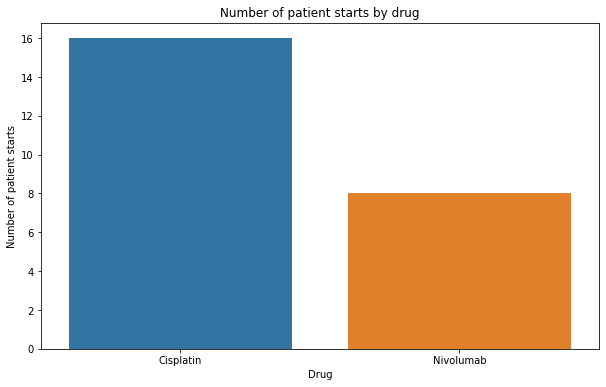

In [45]:
# Let's do the same groupby as above to get the number of patient starts per drug.
# This time, we actually assign the output to a new dataframe `counts` to make the change permanent.
counts = tx\
    .groupby('Drug')\
    .count()[['PatientID']]\
    .reset_index()

# Let's use a simple bar chart in Seaborn to compare counts for the two drugs
# There are several different ways to do the plotting - this is my preferred style,
# but you might prefer different syntax
fig = sns.barplot(data=counts, x='Drug', y='PatientID')
plt.title('Number of patient starts by drug')
plt.ylabel('Number of patient starts')
plt.xlabel('Drug')
plt.show(fig)

## Question 3: Changes to treatment over time
**Do we see any changes in treatment patterns over time?**

Our data shows treatment starts by date. Let's group these starts by month to see if there are any changes of how many patients start on a given drug over time, e.g. because a new drug got approved.

*Note that the data we're using here is dummy data and pretty artificial - oncology clinics see a much higher volume of patients, and drug uptake is usually slower than shown here.*

In [97]:
# Let's add a new column that only has the treatment *month* to simplify things
# There are many different ways to do this, we picked a simple one called "astype"
tx['TreatmentStartMonth'] = tx['TreatmentStart'].astype('datetime64[M]')

# NOTE .astype('datetime64[M]') only works in more recent versions of Pandas, this is an older version:
# from datetime import datetime
# tx['TreatmentStartMonth'] = tx['TreatmentStart'].apply(lambda x: x.replace(day=1))

tx.head()

,PatientID,TreatmentStart,Drug,Dosage,TreatmentStartMonth
0,PT1,1/14/16,Cisplatin,200,2016-01-01
1,PT20,1/2/16,Cisplatin,140,2016-01-01
2,PT2,1/10/16,Cisplatin,180,2016-01-01
3,PT3,1/24/16,Cisplatin,140,2016-01-01
4,PT4,2/14/16,Cisplatin,200,2016-02-01


In [47]:
# Let's count the number of starts per month per drug to plot it later
# We only want the number of patients, so we filter for that column at the end
drugs_by_month = tx.groupby(['TreatmentStartMonth', 'Drug']).count()[['PatientID']]
drugs_by_month

PatientID
TreatmentStartMonth Drug                
2016-01-01          Cisplatin          4
2016-02-01          Cisplatin          3
2016-03-01          Cisplatin          3
                    Nivolumab          1
2016-04-01          Cisplatin          3
                    Nivolumab          1
2016-05-01          Cisplatin          2
                    Nivolumab          2
2016-06-01          Cisplatin          1
                    Nivolumab          4

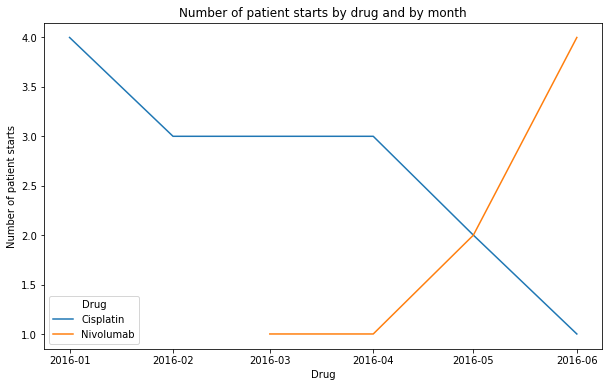

In [48]:
# The data already looks interesting... let's plot this 
# Remember to reset_index so we can plot the regular columns
# The "hue" keyword is generally used to distinguish two different categorical variables
# in plots, e.g. in this case the two different drugs
# NOTE: lineplot() only exists in Seaborn version 0.9 and up
fig = sns.lineplot(data=drugs_by_month.reset_index(), 
                   x='TreatmentStartMonth', 
                   y='PatientID',
                   hue='Drug')
plt.title('Number of patient starts by drug and by month')
plt.ylabel('Number of patient starts')
plt.xlabel('Drug')
plt.show(fig)

## <span style="color:blue">*** DIY exercise ***</span>
Plot drugs_by_month as a clustered barplot instead of lineplot. Make sure you're clear about what your x, y, and hue are in this case!

Note that the date labeling on the x axis doesn't look good because Seaborn converts the month back to a datetime. There are several ways to deal with this - can you think of one possible solution that works in this particular case?

## [Optional] Question 4: Dosage and outliers
**Question: What is the average dosage of each drug? Are there any outliers?**

In [49]:
# An easy first step is to group by the respective drug and use describe()
tx.groupby(['Drug']).describe()

Dosage                                                         
           count     mean         std    min    25%    50%    75%     max
Drug                                                                     
Cisplatin   16.0  276.875  406.754943  140.0  160.0  180.0  192.5  1800.0
Nivolumab    8.0  240.000    0.000000  240.0  240.0  240.0  240.0   240.0

In [50]:
# This is an example of a more complex way to get aggregates in Pandas
# The agg function takes a dictionary of column:function pairs,
# where "function" can be a built-in function like count, mean, min, etc, 
# or a custom function like a lambda.
tx.groupby(['Drug']).agg({'Dosage': 'mean'})

,Dosage
Drug,
Cisplatin,276.875
Nivolumab,240.000


In [51]:
# We can also pass a list of functions to a column to get multiple outputs!
tx.groupby(['Drug']).agg({'Dosage': ['count', 'mean', 'std', 'min', 'max']})

Dosage                                
           count     mean         std  min   max
Drug                                            
Cisplatin     16  276.875  406.754943  140  1800
Nivolumab      8  240.000    0.000000  240   240

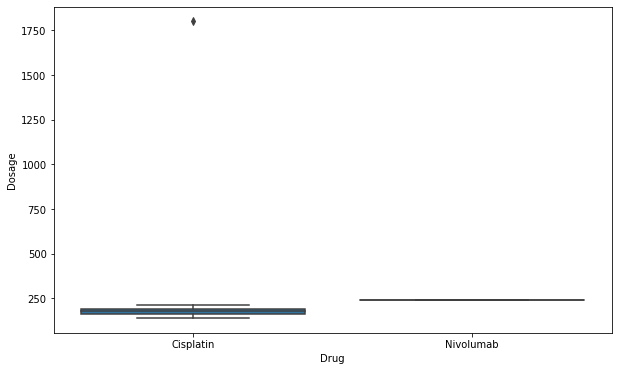

In [52]:
# We can plot this easily in Seaborn - but the outlier squashes our display
fig = sns.boxplot(data=tx, x='Drug', y='Dosage')
plt.show(fig)

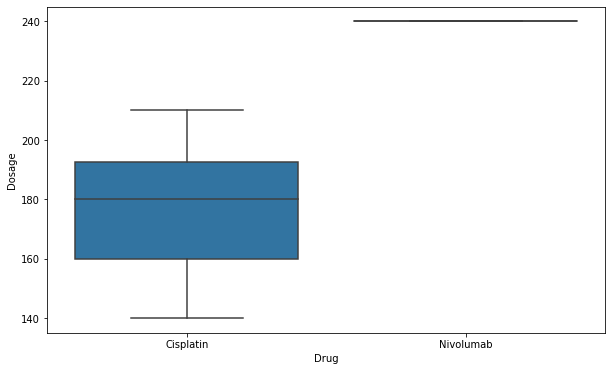

In [53]:
# Use showfliers=False in a boxplot to suppress outliers
fig = sns.boxplot(data=tx, x='Drug', y='Dosage', showfliers=False)
plt.show(fig)

# Part 4: Summary!

We hope this workshop was useful for you. We've only touched on some of the **basic concepts** of Pandas, but we believe this will give you the foundations to keep exploring the data! We covered:

- Basic operations in Jupyter notebooks
- Dataframes and Series in Pandas, and loading data to a dataframe
- Basic data inspection (head, describe, dtypes, accessing columns and rows, sorting)
- Grouping and aggregating (count, nunique)
- Indexing in dataframes and reset_index
- Plotting (bar plots, line plots)

**What we didn't learn:**

This is my (biased) list of very frequent Pandas operations that we didn't cover but you'll likely need for data analysis:
- Joining/merging multiple dataframes
- Filtering and de-duplicating dataframes
- More complex modifications of column values, e.g. filling null values, using lambda functions
- More complex aggregates on grouped dataframes (sum, mean, etc)
- Renaming columns (e.g. renaming an aggregate "PatientID" column to something more meaningful like "PatientCount")

Let me know what you think! samanthapbail@gmail.com / [@spbail](http://twitter.com/spbail)